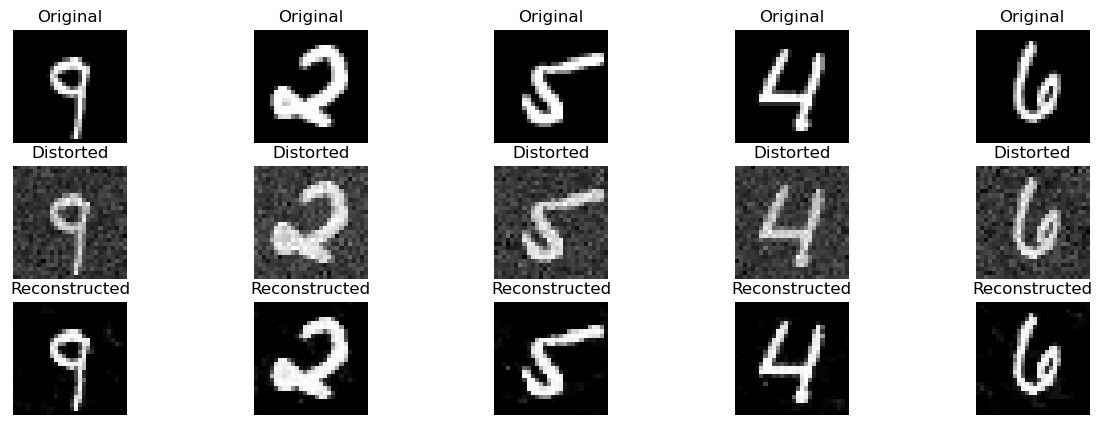

Average Test Loss: 0.0020


In [1]:
import torch
import torch.nn as nn
import torchvision
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import transforms
import matplotlib.pyplot as plt

# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(16, 32, kernel_size=3, stride=2, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(32, 16, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, kernel_size=3, stride=2, padding=1, output_padding=1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Load the MNIST test dataset
transform = transforms.Compose([transforms.ToTensor()])
test_dataset = MNIST(root='./data', train=False, transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=True)

# Load the trained Autoencoder model
autoencoder = Autoencoder()
autoencoder.load_state_dict(torch.load('autoencoder_model.pth'))
autoencoder.eval()

# Initialize variables for visualization and loss calculation
num_samples_to_visualize = 5
original_images = []
distorted_images = []
reconstructed_images = []
total_loss = 0.0
num_batches = 0

# Create a function to distort an image
def distort_image(image):
    # Simulate a simple distortion, you can customize this for your use case
    return image + torch.randn_like(image) * 0.1  # Adding Gaussian noise

# Evaluate the Autoencoder, visualize results, and calculate the average loss
criterion = nn.MSELoss()
with torch.no_grad():
    for _ in range(num_samples_to_visualize):
        images, _ = next(iter(test_loader))
        original_images.append(images.squeeze(0))
        
        # Distort the image
        distorted = distort_image(images)
        distorted_images.append(distorted.squeeze(0))
        
        reconstructions = autoencoder(distorted)
        reconstructed_images.append(reconstructions.squeeze(0))
        
        loss = criterion(reconstructions, images)
        total_loss += loss.item()
        num_batches += 1

# Calculate the average loss
average_loss = total_loss / num_batches

# Display original, distorted, and reconstructed images
plt.figure(figsize=(15, 5))
for i in range(num_samples_to_visualize):
    plt.subplot(3, num_samples_to_visualize, i + 1)
    plt.imshow(original_images[i].squeeze(0).cpu().detach().numpy(), cmap='gray')
    plt.title("Original")
    plt.axis('off')
    
    plt.subplot(3, num_samples_to_visualize, i + num_samples_to_visualize + 1)
    plt.imshow(distorted_images[i].squeeze(0).cpu().detach().numpy(), cmap='gray')
    plt.title("Distorted")
    plt.axis('off')
    
    plt.subplot(3, num_samples_to_visualize, i + 2*num_samples_to_visualize + 1)
    plt.imshow(reconstructed_images[i].squeeze(0).cpu().detach().numpy(), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

# Display the average loss
print(f"Average Test Loss: {average_loss:.4f}")
